## HUMAN EMOTION RECOGNITION USING TWITTER SENTIMENT ANALYSIS
***

### (1) Importing required libraries
The very first step of any analysis or model building project is to identify and import the necessary libraries and modules into the project file. Here, since we are using Python, we make use of the following libraries:
* Pandas : For loading the dataset and cleaning it
* Matplotlib and Seaborn : Data Visualisations
* ntlk toolkit: For performing lemmetization
* Skitlearn : For model building

In [119]:
# utilities
import re
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

#metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

#import warnings
import warnings
warnings.filterwarnings('ignore')

### (2) Loading the dataset


In [120]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv("E:\\Twitter Sentiment Analysis.csv",encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
322497,0,2004408075,Tue Jun 02 08:09:19 PDT 2009,NO_QUERY,SpunkyEclectic,@helloyarn no. They say it won't ship until a...
721337,0,2261163388,Sat Jun 20 20:21:39 PDT 2009,NO_QUERY,mhsteller,"Not happy. Just lost Mia's sensor, and it's o..."
645797,0,2236369709,Fri Jun 19 03:32:06 PDT 2009,NO_QUERY,katemate09,@DeepyJo woooooohoooo! Congratulations wish I ...
736748,0,2265076898,Sun Jun 21 05:43:45 PDT 2009,NO_QUERY,Delta257,@talzgir saaaaaaaaaaaaaaaaaaaaad sunday is ov...
1484023,4,2067586963,Sun Jun 07 12:36:30 PDT 2009,NO_QUERY,alexmcadams,Driving home. Won't be back in Oxford again un...


### (3) Performing Exploratory Data Analysis
This involves exploring the dataset and identifying its key features.

In [121]:
print(df.head(5))    #top 5 rows of the dataframe

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [122]:
print(df.describe)       #gives summary of the data present in the dataframe

<bound method NDFrame.describe of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfo

In [123]:
print(df.shape)      #returns the shape of the dataset

(1600000, 6)


In [124]:
print(df.dtypes)     #returns the dtypes of the data present in each column

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


In [125]:
#no. of rows and columns in the dataset
print('No. of rows in the dataset: ',len(df))
print('No. of columns in the dataset: ',len(df.columns))

No. of rows in the dataset:  1600000
No. of columns in the dataset:  6


In [126]:
#column names
print(df.columns)

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')


In [127]:
#checking for null/missing values
print(df.isnull().sum().sum())

0


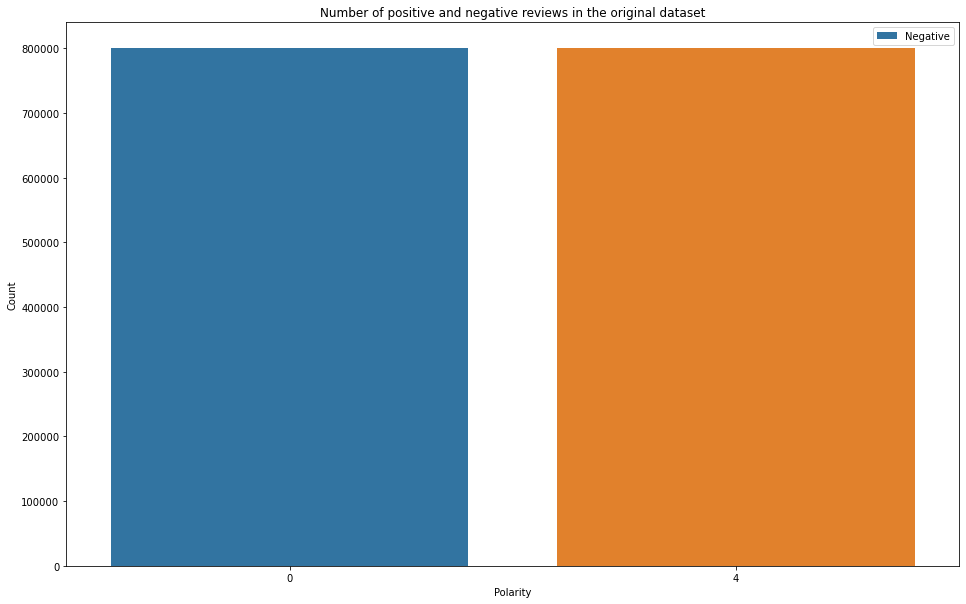

In [128]:
#original dataset visualization
plt.figure(figsize=(16,10))
sns.countplot(x='target',data=df)
plt.legend(['Negative','Positive'])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Number of positive and negative reviews in the original dataset')
plt.show()

We see that there are equal number of positive and negative labelled tweets in the dataset

### (4) Data Preprocessing
* Now as we have got a summary of the data present with us, we now proceed 
and clean the data. 
* This is an important step in any model building project
as dirty and sometimes even a large amount of data can make our work difficult.
* Hence, it is essential to pre-process the data before proceeding.
*This involves remocing all the unnecessary urls, hashtags, geographic locations,
repeaed words(here prepositions, conjunctions, pronounds, nouns which do not 
actually represent the emotion behind the tweet are removed), numbers, etc.,.

In [129]:
#creating a dataframe using the 'target' and 'text' columns
tweet_data=df[['target','text']]
print(tweet_data.sample(5))

         target                                               text
333815        0                           no don't turn the table 
1442505       4  Thx to the golden child of wisdom and compassi...
1026840       4  @DaneDeezay yes okay, I like mutha fuckin' rus...
987661        4  Happy Monday everyone! Let's make this a great...
624849        0  So bored at work  .......... Oh and GloMineral...


In [130]:
#converting all the 20000 tweets into lowercase strings
tweet_data['text']=tweet_data['text'].str.lower()
tweet_data['text'].head(5)

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

**Defining the stopwords to be removed**

In [131]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
                'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves','u','r','im']

**Removing the unnecessary stop words**


In [132]:
STOPWORDS = set(stopwordlist)

### this function removes the stopwords from the text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_data['text'] = tweet_data['text'].apply(lambda text: remove_stopwords(text))
tweet_data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

**Removing repeated words**

In [133]:
### this function removes any repeated words from the text
def removing_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

tweet_data['text'] = tweet_data['text'].apply(lambda x: removing_repeating_char(x))
tweet_data['text'].head()

0    @switchfoot http://twitpic.com/21zl - awww, th...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

**Removing URLs from the data**

In [134]:
### this function removes urls from the text if any
def removing_URLs(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)

tweet_data['text'] = tweet_data['text'].apply(lambda x: removing_URLs(x))
tweet_data['text'].head()

0    @switchfoot  s bummer. shoulda got david carr ...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

**Removing numericals**

In [135]:
### this function removes numerics from text
def removing_numbers(data):
    return re.sub('[0-9]+', '', data)

tweet_data['text'] = tweet_data['text'].apply(lambda x: removing_numbers(x))
tweet_data['text'].head()

0    @switchfoot  s bummer. shoulda got david carr ...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

### (5) Stemming

In [136]:
st = nltk.PorterStemmer()
def stemming_on_tweets(data):
    text = [st.stem(word) for word in data]
    return data

tweet_data['text']= tweet_data['text'].apply(lambda x: stemming_on_tweets(x))
tweet_data['text'].head()

0    @switchfoot  s bummer. shoulda got david carr ...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [137]:
X=tweet_data.text.astype(str)
y=tweet_data.target.astype(str)

### (6) Splitting the dataset for training and testing
Here, the dataset is split in 3:1 ratio for training and testing respectively.

In [138]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =1)

### (7) Vectorization

The next step is to vectorize the collection of words into a vector of tokens

In [139]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)  
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  500000


In [140]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

### (8) Building function for model evaluation

In [141]:
def model_evaluation(model):
    
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    
# Computing and plotting the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    sns.heatmap(cf_matrix,fmt='d',cmap='BuPu',annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    print(accuracy_score(y_test,y_pred))

### (9) Model building and training
Now the model is tested using the train dataset and the accuracy and correctness is represented through a confusion matrix.
* Building model using logistic regression method.
* Train the dataset.
* Test the model using test dataset and predict the results.
* Evaluate the model

### (a) Logistic Regression Model

[[160566  39683]
 [ 34385 165366]]
0.81483


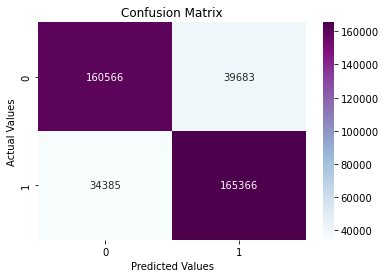

In [142]:
logistic_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
model_evaluation(logistic_model)

In [143]:
def predict_emotion(s):
    s=[s]
    s=remove_stopwords(s)
    s=removing_repeating_char(s)
    s=removing_URLs(s)
    s=removing_numbers(s)
    s=removing_numbers(s)
    s=stemming_on_tweets(s)
    s=vectorizer.transform([s])
    ans=logistic_model.predict(s)
    if ans=='4':
        return "Sentiment: Positive"
    elif ans=='0':
        return "Sentiment: Negative"

In [144]:
# random text input
print(predict_emotion('I liked the food at the restaurant'))

Sentiment: Positive


In [ ]:
#give custom user input
user_input=input()
print(predict_emotion(user_input))